# Titanic Survival Prediction

# Introduction

We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers,
and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers.

#  Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset

In [10]:
data = pd.read_csv("Titanic-Dataset.csv")

In [12]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Understanding of data

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Preprocessing

In [27]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling the null values 

In [28]:
data[['Age','Fare','Sex','Embarked']] 

,Age,Fare,Sex,Embarked
0,34.5,7.8292,male,Q
1,47.0,7.0000,female,S
2,62.0,9.6875,male,Q
3,27.0,8.6625,male,S
4,22.0,12.2875,female,S
...,...,...,...,...
413,NaN,8.0500,male,S
414,39.0,108.9000,female,C
415,38.5,7.2500,male,S
416,NaN,8.0500,male,S


# checking duplicate values

In [11]:
dup = data.duplicated().sum()
print("The number of duplicated values in the dataset are: ", dup)

The number of duplicated values in the dataset are:  0


In [12]:
Embarked = data['Embarked'].unique()
for Embarked in Embarked:
    print("->",Embarked)

-> Q
-> S
-> C


In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Visualization

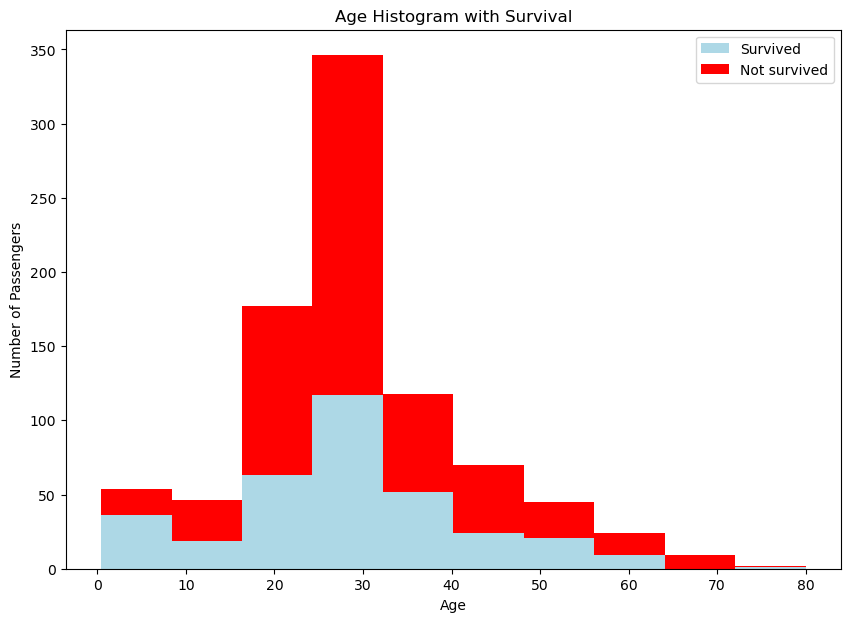

In [23]:
# Fixing fillna warning
data['Age'] = data['Age'].fillna(data['Age'].median())

# Plot
fig = plt.figure(figsize=(10, 7))
plt.hist(
    [data[data['Survived'] == 1]['Age'],
     data[data['Survived'] == 0]['Age']],
    stacked=True,
    color=['lightblue', 'red'],
    label=['Survived', 'Not survived']
)
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


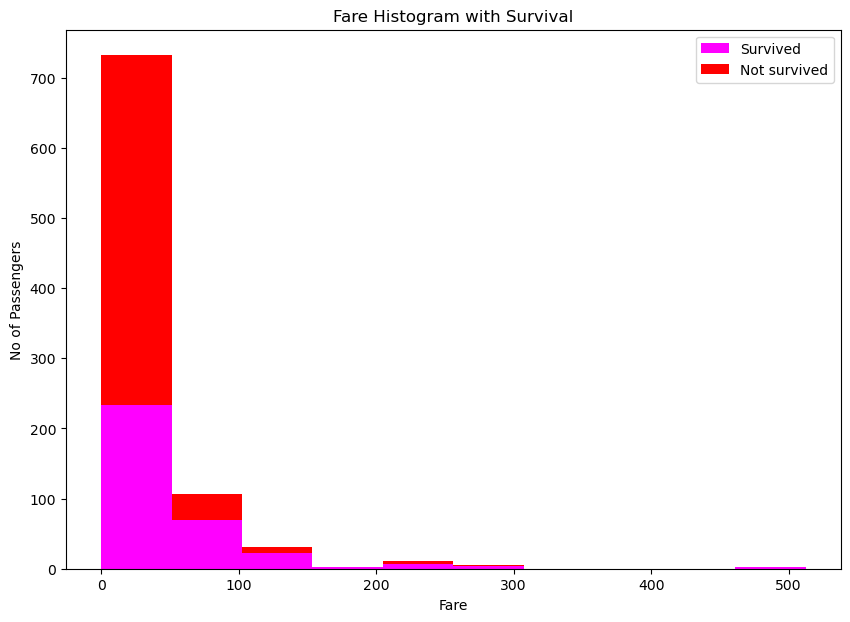

In [29]:
fig = plt.figure(figsize=(10, 7))
plt.hist(
    [data[data['Survived'] == 1]['Fare'],
     data[data['Survived'] == 0]['Fare']],
    stacked=True,
    color=['magenta', 'r'],
    label=['Survived', 'Not survived']
)
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of Passengers')
plt.legend()
plt.show()


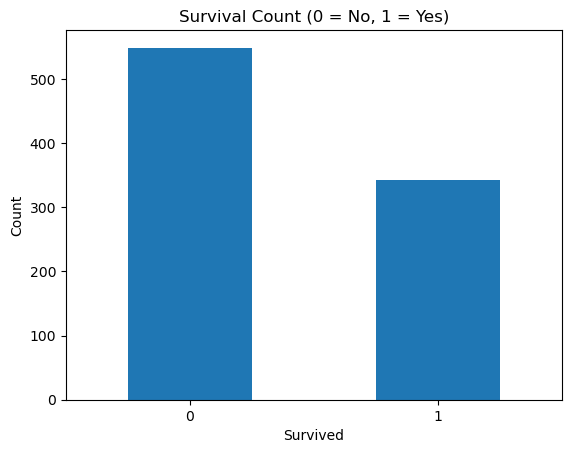

In [31]:
column = 'Survived'
survival_counts = data[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot

plt.show()